
Hello and welcome to this porfolio project (Life Expectancy and GDP)

This project is part of the Data Science: Machine Learning specialist career path  provided by Codecademy

I would like to thank anyone who dedicated time to review this project 

-----------------------------------------------------------------------------------------------------------------


The premise of the project is to explore the relationship between Life expectancy and GDP.

            Life expectancy being the average number of years a person is expected to live typically "calculated" at birth
            
            GDP short for the Gross Domestic Product being the total market value of all final goods and services produced                                     within a country's borders in a given year. (A measure for the economy)
            
            Note: GPD in this case is in US dollars
            
The dataset contains 16 measured values for life expectancy and GDP for 16 years ranging from 2000 untill 2015.

The data are provided for six countries : Chile, China, Germany, Mexico, The United States, Zimbabwe .


-----------------------------

I would like to tackle three main goals and hopefully provided an asnwer for them.

     
        1. How did Life expectancy and GDP progress over time ?
        2. How does the (Average or Median) life expectancy and GDP differ across the countries ?
        3. What is the relationship between Life expectancy and GDP ?
        
-----------------------

In [50]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [51]:
# Load the dataset into a dataframe 

Life_e =  pd.read_csv('all_data.csv')
print(f"{len(Life_e)} rows") 

96 rows


In [52]:
# Inspect some rows

print(Life_e.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [53]:
# Adjusting life expectancy column name

Life_e.rename(columns = {'Life expectancy at birth (years)':'Life_expectancy'},inplace = True)

In [54]:
# Making sure that the data types are in line with what is expected 

Life_e.dtypes

Country             object
Year                 int64
Life_expectancy    float64
GDP                float64
dtype: object

In [55]:
# Full list of the countries with the amount of entries recorded

Life_e.Country.value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [56]:
# To understand the GDP, another column will be added to display the price (string)

Life_e["GDP_f"] = Life_e.GDP.apply(lambda x: f"{x/1e9:.3f} Billion")  # 1e9 = 1 x (10 to the power of 9) 
print(Life_e.head())

  Country  Year  Life_expectancy           GDP           GDP_f
0   Chile  2000             77.3  7.786093e+10  77.861 Billion
1   Chile  2001             77.3  7.097992e+10  70.980 Billion
2   Chile  2002             77.8  6.973681e+10  69.737 Billion
3   Chile  2003             77.9  7.564346e+10  75.643 Billion
4   Chile  2004             78.0  9.921039e+10  99.210 Billion


In [57]:
Life_e.isna().any() # Seems like there are no missing values

Country            False
Year               False
Life_expectancy    False
GDP                False
GDP_f              False
dtype: bool

In [58]:
# Before addressing the relationship between GDP and Life expectancy lets review some summary statistics

Life_e.describe()

,Year,Life_expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [59]:
# Min and Max GDP values 

minimum = Life_e.GDP.min()
maximum = Life_e.GDP.max()

print(f"Overall Range of GDP: [{minimum}$ - {maximum}$]")


Overall Range of GDP: [4415702800.0$ - 18100000000000.0$]


In [60]:
Life_e[Life_e.GDP == minimum] # Relating other variabels to the minimum and the maximum GDP value

,Country,Year,Life_expectancy,GDP,GDP_f
88,Zimbabwe,2008,48.2,4.415703e+09,4.416 Billion


In [61]:
Life_e[Life_e.GDP == maximum]

,Country,Year,Life_expectancy,GDP,GDP_f
79,United States of America,2015,79.3,1.810000e+13,18100.000 Billion


In [62]:
# Min and Max Life Expectancy

minimum = Life_e.Life_expectancy.min()
maximum = Life_e.Life_expectancy.max()

print(f"min: {minimum} years , max: {maximum} years")


min: 44.3 years , max: 81.0 years


In [63]:
# Understanding both the mean/median value and the variation in GDP values and Life expectancy 

mean_gdp = Life_e.GDP.mean()
median_gdp = Life_e.GDP.median()

mean_life_e = Life_e.Life_expectancy.mean()
median_life_e = Life_e.Life_expectancy.median()

st_dev_gdp = Life_e.GDP.std() 
IQR_gdp = np.percentile(Life_e.GDP,75) - np.percentile(Life_e.GDP,25)  # Another measure of spread (variation) (Inter Quantile Range) 
                                                                       # Data between 25% of the data and 75% percent


st_dev_life_e = Life_e.Life_expectancy.std()
IQR_life_e = np.percentile(Life_e.Life_expectancy,75) - np.percentile(Life_e.Life_expectancy,25)



In [64]:
print(f"Typical GDP value (mean): {mean_gdp}$ | median: {median_gdp}$")
print(f"Typical life expectancy (mean): {mean_life_e} years | median: {median_life_e} years ")

Typical GDP value (mean): 3880498570768.396$ | median: 1280220000000.0$
Typical life expectancy (mean): 72.78958333333334 years | median: 76.75 years 


In [65]:
print(f"The standard variation of GDP : {st_dev_gdp}$")
print(f"The standard variation of Life expectancy : {st_dev_life_e} years") # The higher the value the more varying the data is, 
                                                                      # meaning that they are farthur away from the center(mean) 

print(f"The IQR of GDP : {IQR_gdp}$")
print(f"The IQR of Life expectancy : {IQR_life_e} years")

The standard variation of GDP : 5197561310975.917$
The standard variation of Life expectancy : 10.6728823036079 years
The IQR of GDP : 3894208250000.0$
The IQR of Life expectancy : 4.425000000000011 years


--------------------------------------
It is important to look at the distribution of GDP values and Life expectancy to look for potential outliers that could affect the credibility of the mean and the standart deviation

--------------------------------------

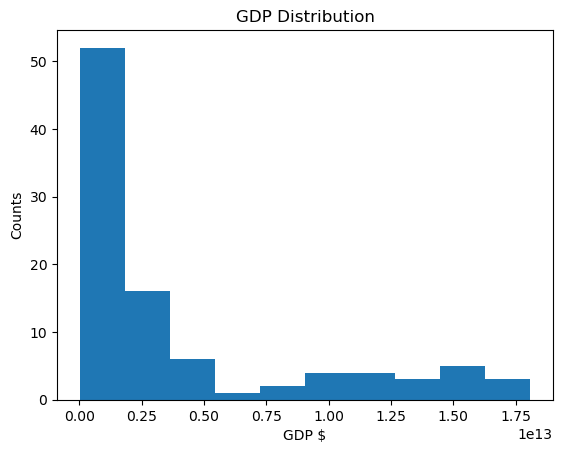

<Figure size 640x480 with 0 Axes>

In [66]:
plt.hist(Life_e.GDP)
plt.xlabel("GDP $")
plt.ylabel("Counts")
plt.title("GDP Distribution")
plt.show()
plt.clf()

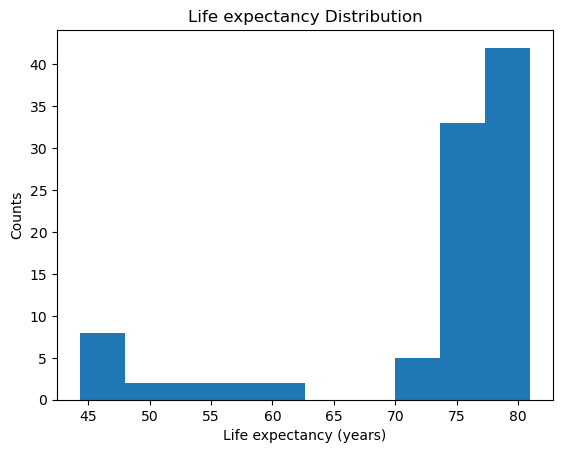

<Figure size 640x480 with 0 Axes>

In [67]:
plt.hist(Life_e.Life_expectancy)
plt.xlabel("Life expectancy (years)")
plt.ylabel("Counts")
plt.title("Life expectancy Distribution")
plt.show()
plt.clf()

-------------------------------------------------
The visuals indicate skewness in the data meaning that using the average (mean) to represent typicality might be misleading so using the Median is safer in addition to using the IQR (Inter Quantile Range) instead of the standard deviation as they are less influenced by outliers.
--------------------------------------
--------------------------------------

Addressing the progression over time - Both of Life expectancy values and GDP values will visualized for each individual country

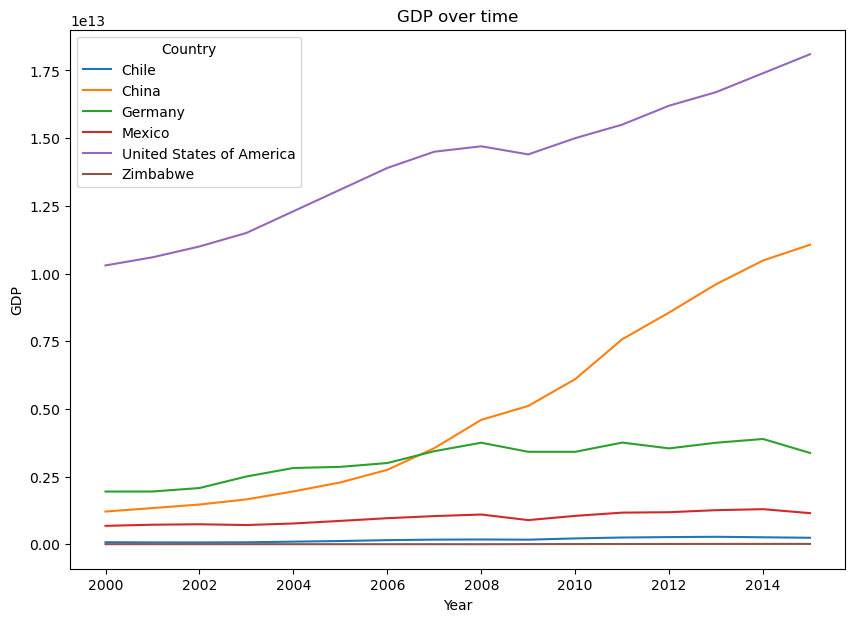

<Figure size 640x480 with 0 Axes>

In [68]:
plt.figure(figsize = (10,7)) # Ajdusting figure size for more clarity and readability
sns.lineplot(x="Year",y="GDP",hue='Country',data=Life_e)
plt.title("GDP over time")
plt.show()
plt.clf()

--------------------------------------
Notice that countries have different GDP values at the start of 2000 with the USA having the highest value, BOTH the USA and China seem to have the biggest rise of GDP values over years.
--------------------------------------
--------------------------------------

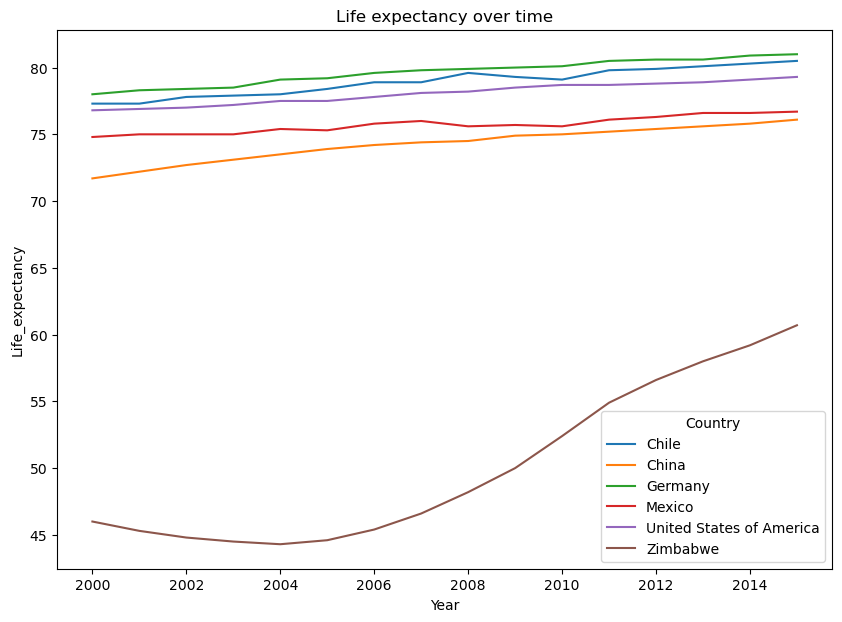

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure(figsize = (10,7)) # Ajdusting figure size for more clarity and readability
sns.lineplot(x="Year",y="Life_expectancy",hue='Country',data=Life_e)
plt.title("Life expectancy over time")
plt.show()
plt.clf()

--------------------------------------
Seems like Germany has had the highest Life expectancy value for all recorded years while Zimbabwe has the had the lowest, however it interesting to note that value of GDP that Zimbabwe recorded over the years has been on the lower end and was visually stable on the line plot yet has recorded an increase in Life expectancy over time.
--------------------------------------

--------------------------------------

Moving on -> The average Life expectancy and GDP values will be compared across all countries

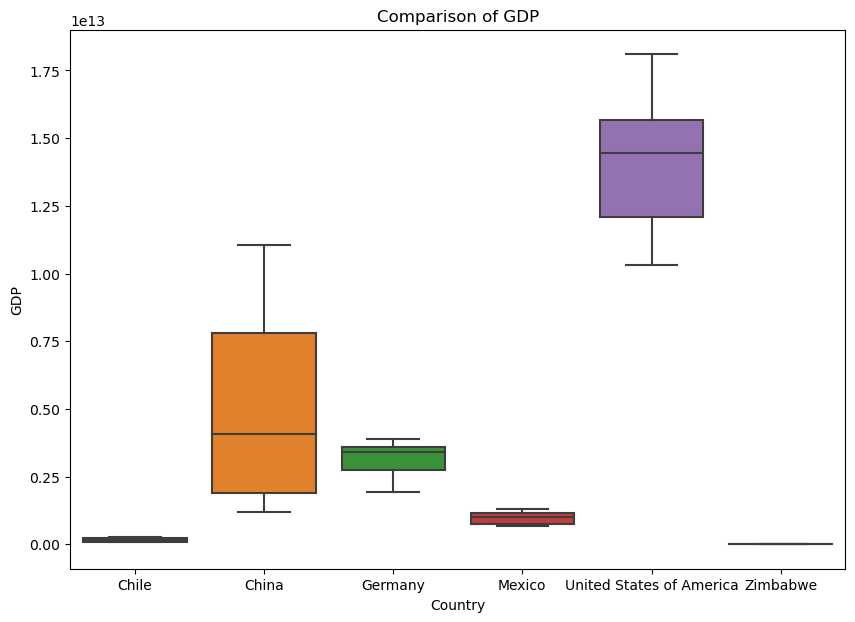

<Figure size 640x480 with 0 Axes>

In [70]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'GDP',x = 'Country',data = Life_e)
plt.title("Comparison of GDP")
plt.show()
plt.clf()

------------------------------------------
Side-by-Side boxplots are made of the (min,25th percentile,median,75 percintile and the max). A very usefull visual to compare these summary statistics between countries.
--------------------------------------
It is clear that the USA has the highest median value of GDP while Zimbabwe has the least.
--------------------------------------
It also appearent that China has had the most variation in the GDP values with the highest IQR  (The range between the start and end of the box itself (orange part in the visual))            
--------------------------------------
--------------------------------------

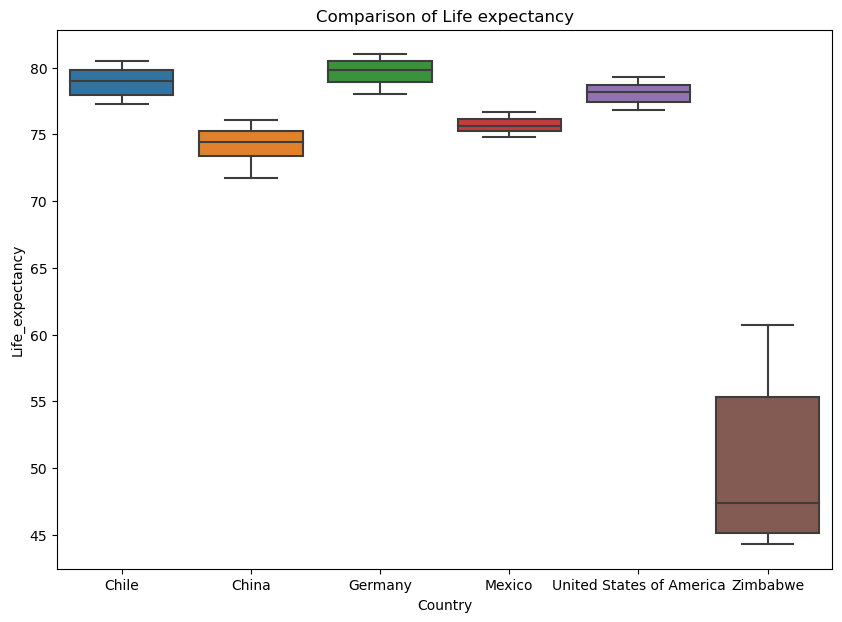

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'Life_expectancy',x = 'Country',data = Life_e)
plt.title("Comparison of Life expectancy")
plt.show()
plt.clf()

-------------------------
Zimbabwe has the lowest value of median Life expectancy among all the countreis present while germany has the highest recorded median among them all, however Zimbabwe seems to have the most variation of Life expectancy values around the median contrary to other countries that show less variation as there values are closer to the medaian
--------------------------
----------------------

Progressing through this project we addressed how both Life expectancy and GDP values have progressed over time for the individual countries and then compared (box plots) representing each country to understand the central tendency (median mainly) and the spread (IQR mainly) of the both values. The last section addresses the correlation between GDP and Life expectancy to see any general relationship between them.

---------------------------------

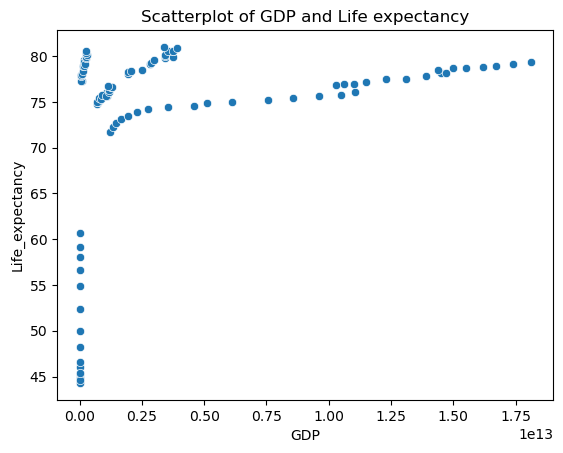

<Figure size 640x480 with 0 Axes>

In [72]:
# Inspecting the scatter plot of both Life Expectancy and GDP

sns.scatterplot(y='Life_expectancy',x='GDP',data = Life_e)
plt.title("Scatterplot of GDP and Life expectancy")
plt.show()
plt.clf()


In [73]:
pval,st = scipy.stats.pearsonr(Life_e.GDP,Life_e.Life_expectancy)
print(pval)

0.34320674844915594


The scatter plot hints at a positive link between GDP and life expectancy, but the analysis reveals no statistically significant correlation (p-value = 0.3432). This could be due to a weak association, small sample size, or other factors like outliers. Remember, correlation doesn't imply causation, and other factors could play a bigger role in life expectancy. While this analysis doesn't show a direct link, it highlights the need for further exploration of factors influencing population health and well-being.

------------------------------------------------------
I want to conclude this project with a summary:
------------------------------------------------------
------------------------------------------------------
    1 - Both GDP and Life expectancy values has seen increase over time, some coutries with greater rates that others.
------------------------------------------------------   
------------------------------------------------------
    2 - The United States had the highest median GDP value while Zimbabwe had the lowest, China on the other hand had the       highest variation.
------------------------------------------------------
------------------------------------------------------
    3-  The scatterplot hinted torwards a positive relationship between the GDP and Life expectancy yet the pearson         correlation value points to a positive weak relationship, however it's worth noting that some factors like the dataset  size or outliers could be hendering our ability to fully grasp the relationship between the GDP value and Life             expectancy.
------------------------------------------------------

-----------------------------
Thank you for your time!
------------------------------------------------------